Видео лабораторной: https://youtu.be/wAykF0_WGVg

TG: https://t.me/data_science_news



---


In [ ]:
import numpy as np
import matplotlib.pylab as plt

from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

plt.rcParams['figure.figsize'] = [12, 8]

# KS Gondess-of-fit test

Пусть $X_1,...,X_n$ i.i.d. выборка из некоторого распределения $F_1$ _(CDF)_.

Тогда выборочная функция распределения _(ECDF [лабораторная №7](https://youtu.be/dXR2V-_F3yg))_ $\hat{F_1}_n = \frac{\sum_{i=1}^nI(X \leq x_i)}{n}$

Пусть $Y_1,...,Y_n$ i.i.d. **(независимая от $X$)** выборка из некоторого распределения $F_2$ _(CDF)_. С аналогично заданной эмпирической функцией $\hat{F_2}_n$

Предположим, мы хотим протестировать принадлежат ли реализации $X_i$ и $Y_i$ к одному распределению. Для этого сформулируем тест:

$H_0: \hat{F_1}_n = \hat{F_2}_n$ VS $H_1:\ \hat{F_1}_n \neq \hat{F_2}_n$

Непараметрическая тест статистика Колмогорова-Смирнова для двух выборок имеет вид: $D_n=\mathrm{sup}|\hat{F_1}_n(x) - \hat{F_2}_n(y)|$

Или для одной выборки и известного распределения $F$: $D_n=\mathrm{sup}|\hat{F_1}_n(x) - F|$

Где тест-статистика $D_n$ подчиняется [распределнию Колмогорова-Смирнова](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test#Kolmogorov_distribution)



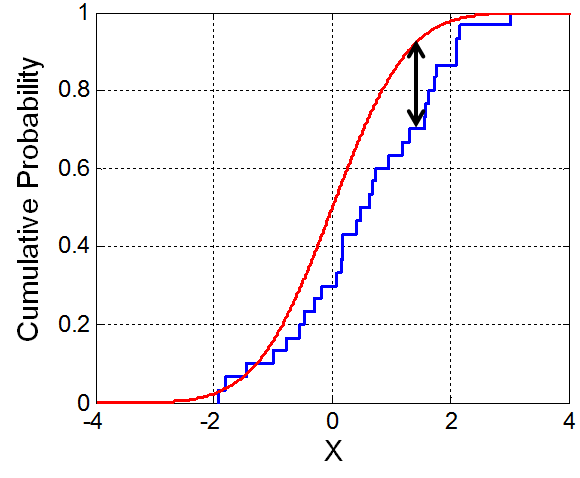

[Source - wikipedia](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test#/media/File:KS_Example.png)

## KS one-smaple test EXAMPLE

### Выборка №1 (sample_1)

$X_1, X_2, ... , X_n$ $\sim$ $N(\mu, \sigma^2)$,

где

$n=100$, $\mu=5$, $\sigma^2=4$

In [ ]:
mu=5
sigma=2
rv_norm = norm(mu, sigma)
sample_1 = rv_norm.rvs(100)
sample_1

array([ 5.07919062,  3.69536054,  4.53606321,  6.24957629,  6.20681993,
        4.3325407 ,  6.71075116,  3.85535992,  6.24678873,  3.32511597,
        5.48017657,  9.57105043,  2.74295381,  6.32608559,  6.73466131,
        3.04849212,  8.63592328,  4.2217072 ,  6.24527705,  3.84945906,
        5.2809855 ,  4.23543496,  6.57530968,  9.40377223,  6.34311573,
        6.47293858,  6.05306387,  4.50916074,  2.17605635,  2.32171392,
        7.16908996,  3.43958813,  9.04263607,  6.2556673 , -0.47138654,
        6.35835368,  2.96462229,  6.33263509,  8.01704533,  4.43518798,
        4.76170265,  7.01271561,  4.40674149,  6.13967201,  1.24710988,
        5.05940738,  5.85418212,  5.18729145,  7.11459916,  4.54973349,
        3.65892012,  3.96966245,  5.83832702,  1.81565688,  5.19720084,
        3.39615097,  8.84907862,  4.79663819,  6.38488336,  5.06727338,
        4.05807249,  4.98007024,  6.14216103,  5.28447523,  9.47445364,
        5.16603127,  4.05867209,  8.11540761,  2.44188567,  2.57

In [ ]:
ecdf = ECDF(sample_1)

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
from scipy.stats import kstest

Alternative: $\hat{F}_1 \neq F$ - двусторонний тест

Text(0.5, 0, 'Normal RV sample (N=100)')

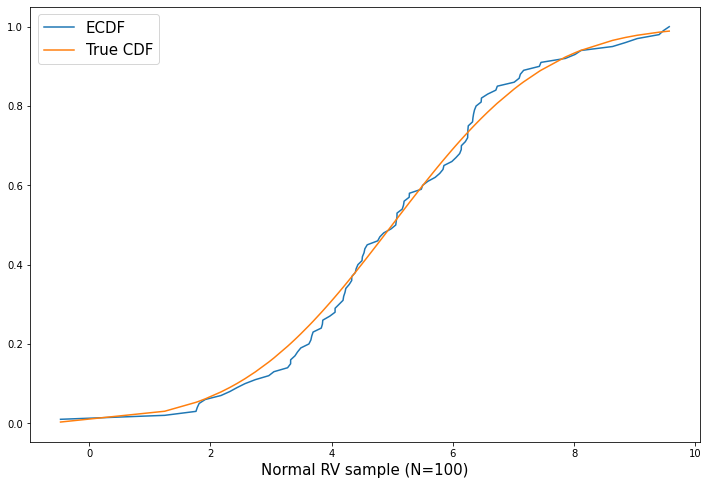

In [ ]:
y_ecdf = ecdf(sample_1)
plt.plot(np.sort(sample_1), np.sort(y_ecdf), label='ECDF')
plt.plot(np.sort(sample_1), rv_norm.cdf(np.sort(sample_1)), label='True CDF')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

In [ ]:
# Test the same distribution
kstest(sample_1, rv_norm.cdf, N=100)

KstestResult(statistic=0.06418295118648226, pvalue=0.8045492039789772)

Text(0.5, 0, 'Normal RV sample (N=100)')

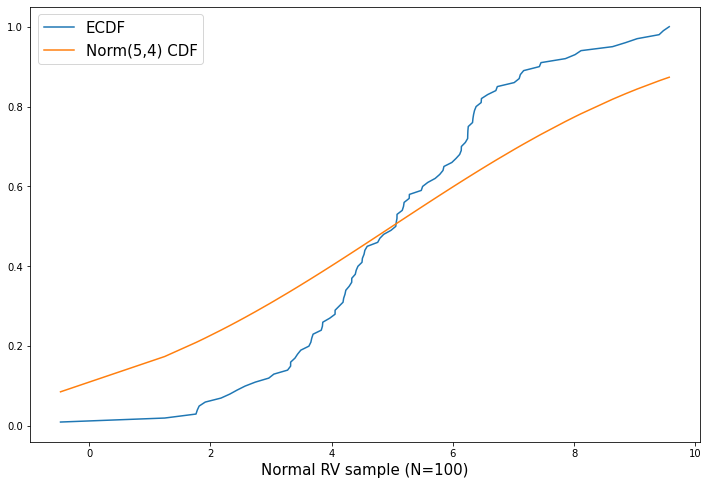

In [ ]:
y_ecdf = ecdf(sample_1)
plt.plot(np.sort(sample_1), np.sort(y_ecdf), label='ECDF')
plt.plot(np.sort(sample_1), norm(5,4).cdf(np.sort(sample_1)), label='Norm(5,4) CDF')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

In [ ]:
# Test another normal
kstest(sample_1, norm(5,4).cdf, N=100)

KstestResult(statistic=0.20312792483611797, pvalue=0.0004287358601834932)

Text(0.5, 0, 'Normal RV sample (N=100)')

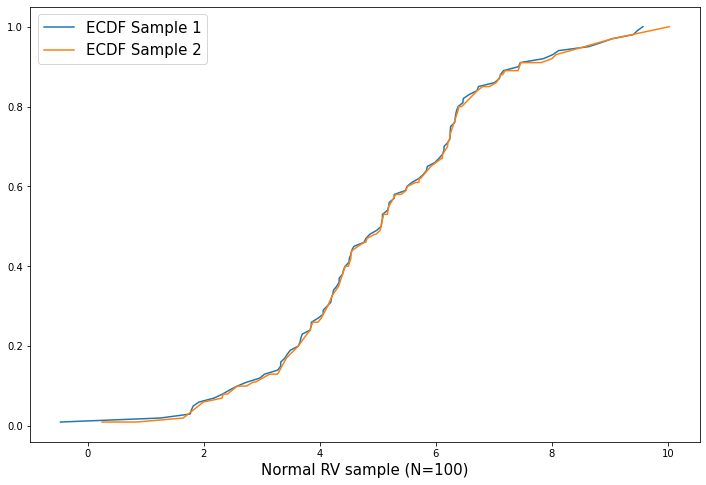

In [ ]:
# Test another sample from the same distribution
sample_2 = norm(mu, sigma).rvs(100)

y_ecdf_1 = ecdf(sample_1)
y_ecdf_2 = ecdf(sample_2)
plt.plot(np.sort(sample_1), np.sort(y_ecdf_1), label='ECDF Sample 1')
plt.plot(np.sort(sample_2), np.sort(y_ecdf_2), label='ECDF Sample 2')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
from scipy.stats import ks_2samp

In [ ]:
ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.09, pvalue=0.8154147124661313)

Alternative: $F_1  < F_2$ - Пример одностороннего теста

Text(0.5, 0, 'Normal RV sample (N=100)')

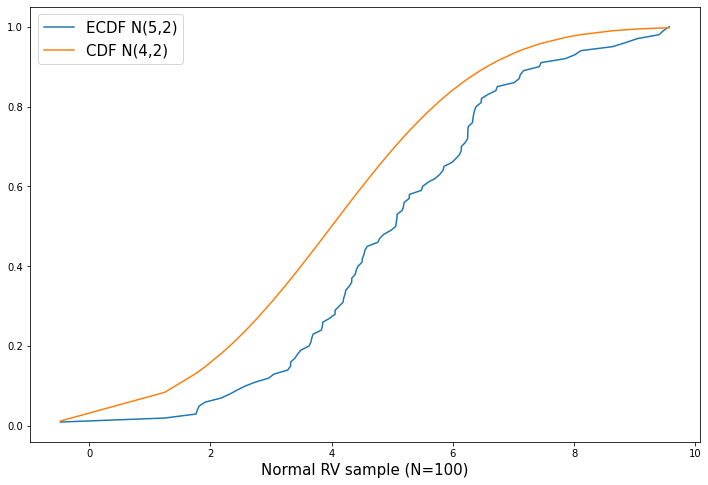

In [ ]:
y_ecdf = ecdf(sample_1)
plt.plot(np.sort(sample_1), np.sort(y_ecdf), label='ECDF N(5,2)')
plt.plot(np.sort(sample_1), norm(4,2).cdf(np.sort(sample_1)), label='CDF N(4,2)')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

In [ ]:
kstest(sample_1, norm(4,2).cdf, N=100, alternative='less')

KstestResult(statistic=0.24158215771226887, pvalue=6.358711841801269e-06)

# Тест на независимость

## Пример 1



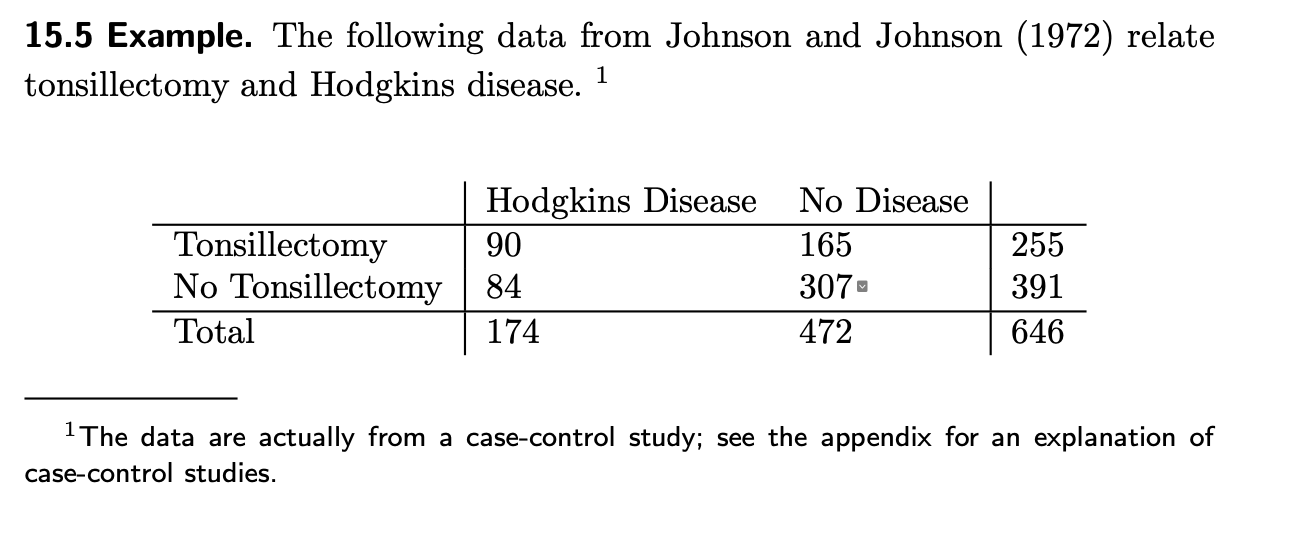

Source: Wasserman L. All of statistics, p.241

## Формулировка теста

$H_0:$ Тонзиллэктомия (удаление миндалин) не влияет на возникновение болезни Ходжкина, то есть, эти бинарные случайные величины независимы.

$H_1:$ Тонзиллэктомия (удаление миндалин) **влияет** на возникновение болезни Ходжкина, то есть, эти бинарные случайные величины зависимы.

Зафиксиррем критерий значимости: $\alpha=0.05$

Пусть $X$ - это случайная величина, моделирующая Тонзиллэктомию, где $X_1=1$ если процедура была проведена и $X_2=0$, если процедуры не было.

Аналогично, для болезни Ходжкина, $Y_1=1$, если диагностирована болезнь и $Y_2=0$ в противном случае.

В условиях нулевой гипотезы, случайные величины $X$ и $Y$ независимы:
- $P(X\ and\ Y) = P(X)P(Y)$ (по определению независимости событий)
- Вероятность возникновения любого варианта из таблицы: $\hat{p}_{i,j}=\hat{p}_i\hat{p}_j=\frac{X_i}{n} \frac{Y_j}{n}$ (по MLE для [мультиномиального распределения](https://en.wikipedia.org/wiki/Multinomial_distribution))
- $E_{i,j}=np_{i,j}$ согласно мультиномиальному распределению




## Рассчитаем оценку $\hat{p}_{i,j}$

In [ ]:
X_1_total = 255
X_2_total = 391
Y_1_total = 174
Y_2_total = 472
N = 646

p_11 = X_1_total/N * Y_1_total/N
p_12 = X_1_total/N * Y_2_total/N
p_21 = X_2_total/N * Y_1_total/N
p_22 = X_2_total/N * Y_2_total/N

print(p_11, p_12, p_21, p_22)

0.10632230731627831 0.2884145347889849 0.16302753788496008 0.44223562000977673


## Рассчитаем $E_{i,j}$

In [ ]:
e_11, e_12, e_21, e_22 = p_11*N, p_12*N, p_21*N, p_22*N
print(e_11, e_12, e_21, e_22)

68.6842105263158 186.31578947368422 105.3157894736842 285.6842105263158


# Тест-статистика

Критерий согласия Пирсона (Pearson's chi-squared test) имеет вид:

$D_2=\sum_{i=1}^r\sum_{j=1}^c \frac{(n_{i,j}-E_{i,j})^2}{E_{i,j}}$,

где $r$ - количество вариантов реализаций $X$, $C$ - количество вариантов реализаций $Y$.

$D_2$ [подчиняется распределению](https://en.wikipedia.org/wiki/Chi-squared_distribution) $\chi^2_{df}$, где $df=(r-1)(c-1)$ - это количество степеней свободы распределения $\chi^2$

Для нашего примера с двумя реализациями для $X$ и $Y$ тест-статистика будет иметь вид:

$D_2=\sum_{i=1}^2\sum_{j=1}^2 \frac{(n_{i,j}-E_{i,j})^2}{E_{i,j}}$

## Расчитаем тест

In [ ]:
n_11 = 90
n_12 = 165
n_21 = 84
n_22 = 307

d_2 = 1/e_11*(n_11 - e_11)**2 + 1/e_12*(n_12 - e_12)**2 + 1/e_21*(n_21 - e_21)**2 + 1/e_22*(n_22 - e_22)**2
print(d_2)

14.95864355957614


In [ ]:
df = (2-1)*(2-1)

## $p$-value

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
from scipy.stats import chi2

1 - chi2(df).cdf(d_2)

0.00010989348314649483